# __Final Project:__ Hierarchical Risk Parity

In [1]:
# importing our required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from mlfinlab.portfolio_optimization import ReturnsEstimators
from mlfinlab.portfolio_optimization import HierarchicalRiskParity

In [2]:
#import historical stock prices data from 2015 - 2020

BBNI = pd.read_csv('BBNI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
CEKA = pd.read_csv('CEKA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DMAS = pd.read_csv('DMAS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DVLA = pd.read_csv('DVLA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
ELSA = pd.read_csv('ELSA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
EPMT = pd.read_csv('EPMT.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDR = pd.read_csv('INDR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDS = pd.read_csv('INDS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
IPCC = pd.read_csv('IPCC.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
LSIP = pd.read_csv('LSIP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MBAP = pd.read_csv('MBAP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFIN = pd.read_csv('MFIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFMI = pd.read_csv('MFMI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MSIN = pd.read_csv('MSIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
NRCA = pd.read_csv('NRCA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PBID = pd.read_csv('PBID.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PGLI = pd.read_csv('PGLI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
POWR = pd.read_csv('POWR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PPRE = pd.read_csv('PPRE.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PTRO = pd.read_csv('PTRO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
SCCO = pd.read_csv('SCCO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
TPMA = pd.read_csv('TPMA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
VINS = pd.read_csv('VINS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
WSBP = pd.read_csv('WSBP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)

l = [BBNI, CEKA, DMAS, DVLA, ELSA, EPMT, INDR, INDS, IPCC, LSIP, MBAP, MFIN, MFMI, MSIN, NRCA, PBID, PGLI, POWR, PPRE, PTRO, SCCO, TPMA, VINS, WSBP]
stock_prices = pd.concat(l,keys= ['BBNI', 'CEKA', 'DMAS', 'DVLA', 
                                 'ELSA', 'EPMT', 'INDR', 'INDS',
                                 'IPCC', 'LSIP', 'MBAP', 'MFIN',
                                 'MFMI', 'MSIN', 'NRCA', 'PBID',
                                 'PGLI', 'POWR', 'PPRE', 'PTRO',
                                 'SCCO', 'TPMA', 'VINS', 'WSBP'],axis=0).reset_index()
stock_prices = stock_prices.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])
stock_prices = stock_prices.set_index('Date', drop=True)
stock_prices = stock_prices.sort_index()
stock_prices = stock_prices.pivot_table('Adj Close', ['Date'], 'level_0')
stock_prices = stock_prices.dropna(axis=0)
# stock_prices = stock_prices.resample('D').sum()


stock_prices.tail(10)

level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-13,4750.0,1980.0,180.0,2170.925049,231.789001,1850.0,2270.0,2152.173828,422.0,875.0,...,348.313202,860.0,216.0,590.0,197.0,1625.0,9350.0,326.0,112.500008,204.0
2020-07-14,4720.0,1990.0,185.0,2200.000000,231.789001,1880.0,2260.0,2142.608643,430.0,890.0,...,344.587921,875.0,226.0,590.0,195.0,1610.0,9375.0,330.0,114.000000,202.0
2020-07-15,4710.0,1980.0,195.0,2210.000000,231.789001,1850.0,2270.0,2133.043457,428.0,940.0,...,339.000000,875.0,226.0,580.0,200.0,1625.0,9375.0,338.0,107.000000,204.0
2020-07-16,4700.0,1990.0,194.0,2220.000000,231.789001,1825.0,2250.0,2056.521729,438.0,940.0,...,339.000000,870.0,250.0,590.0,200.0,1675.0,9350.0,328.0,102.000000,208.0
2020-07-17,4670.0,1995.0,200.0,2190.000000,234.000000,1870.0,2260.0,2133.043457,438.0,945.0,...,340.000000,865.0,234.0,600.0,204.0,1725.0,9600.0,324.0,98.000000,208.0
2020-07-20,4540.0,2000.0,212.0,2160.000000,226.000000,1870.0,2250.0,2190.434814,436.0,990.0,...,324.000000,880.0,218.0,600.0,202.0,1800.0,9600.0,322.0,101.000000,202.0
2020-07-21,4680.0,2000.0,216.0,2190.000000,238.000000,1875.0,2300.0,2152.173828,430.0,1005.0,...,334.000000,875.0,224.0,600.0,195.0,1790.0,9800.0,324.0,98.000000,202.0
2020-07-22,4670.0,2010.0,226.0,2260.000000,238.000000,1875.0,2260.0,2200.000000,434.0,1000.0,...,330.000000,880.0,212.0,600.0,195.0,1800.0,9750.0,324.0,98.000000,202.0
2020-07-23,4710.0,1995.0,220.0,2330.000000,238.000000,1880.0,2300.0,2200.000000,442.0,1015.0,...,324.000000,875.0,214.0,600.0,196.0,1915.0,9725.0,336.0,100.000000,204.0


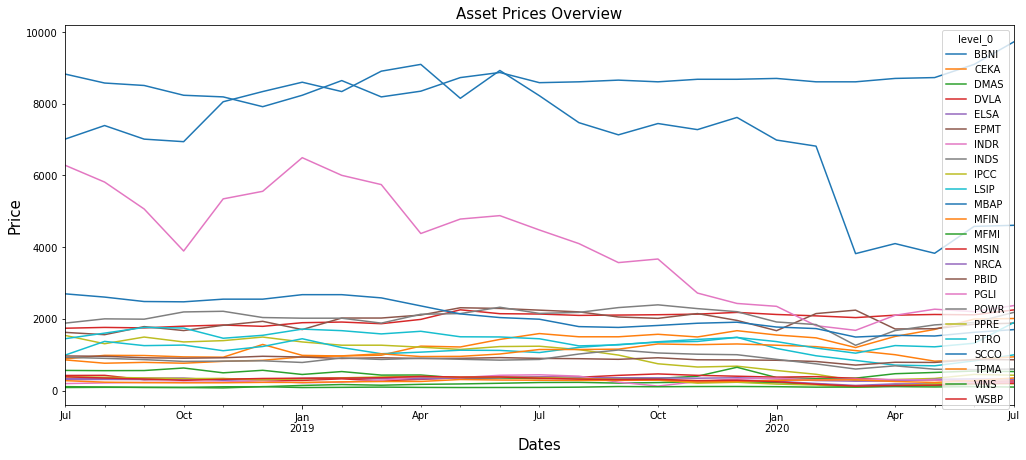

In [3]:
# Taking a quick look at our most recent data points
stock_prices.resample('M').last().plot(figsize=(17,7))
plt.ylabel('Price', size=15)
plt.xlabel('Dates', size=15)
plt.title('Asset Prices Overview', size=15)
plt.show()

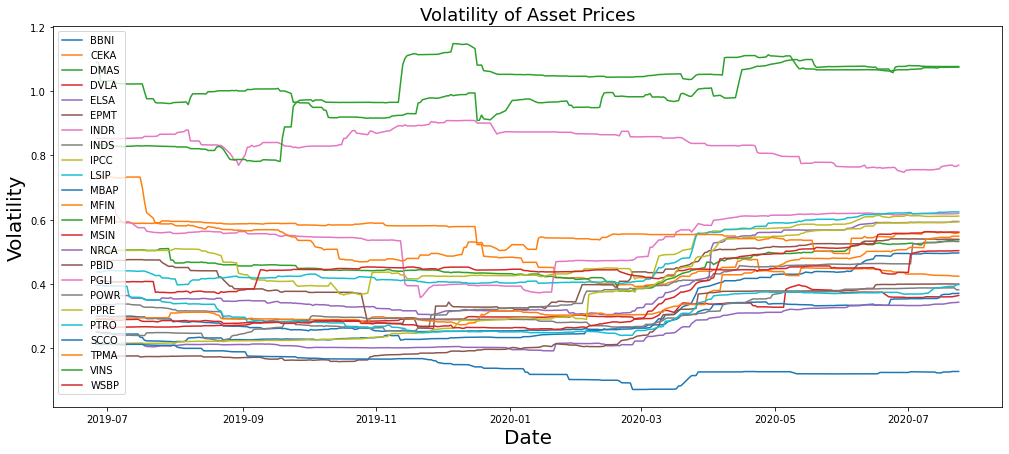

In [4]:
# plotting the volatility of our stocks
volatility = stock_prices.pct_change().rolling(window=252).std()*(252**0.5)

plt.figure(figsize=(17,7))
plt.plot(volatility)
plt.ylabel('Volatility', size=20)
plt.xlabel('Date', size=20)
plt.title('Volatility of Asset Prices', size=18)
plt.legend(stock_prices.columns, loc='upper left')
plt.show()

<Figure size 504x504 with 0 Axes>

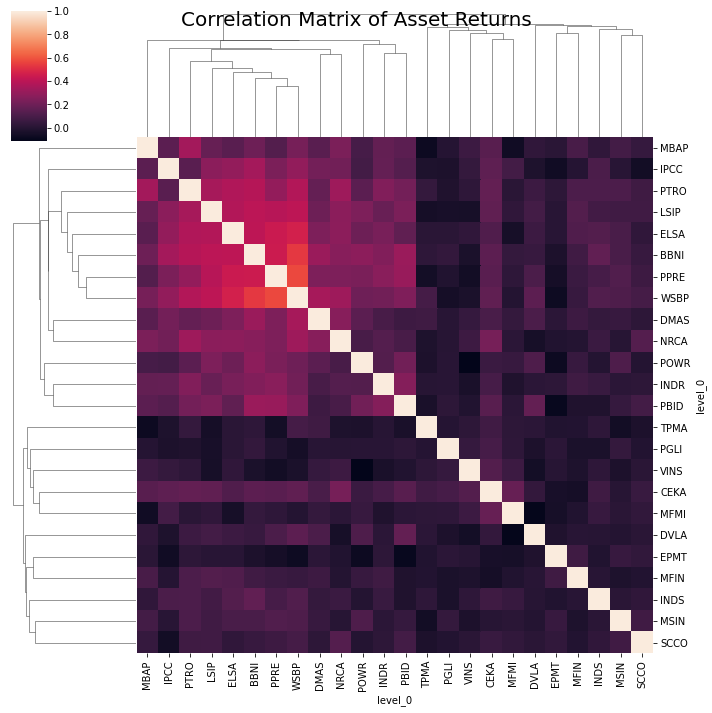

In [5]:
asset_returns = ReturnsEstimators.calculate_returns(stock_prices)
plt.figure(figsize=(7,7))
g = sns.clustermap(asset_returns.corr())
g.fig.suptitle('Correlation Matrix of Asset Returns', fontsize = 20)
plt.show()

In [6]:
# constructing our Single Linkage portfolio
hrp_single = HierarchicalRiskParity()
hrp_single.allocate(asset_names=stock_prices.columns,
                    asset_prices=stock_prices,
                    linkage='single')

print("HRP Portfolio Weights - Single Linkage \n", hrp_single.weights)

HRP Portfolio Weights - Single Linkage 
 level_0      EPMT      TPMA      PGLI      MSIN      VINS      MFIN      SCCO  \
0        0.040804  0.024435  0.015781  0.051299  0.011885  0.056789  0.332322   

level_0      INDS      DVLA      MFMI  ...      NRCA      MBAP      IPCC  \
0        0.051042  0.099942  0.008279  ...  0.046015  0.040976  0.010703   

level_0      DMAS      PTRO      LSIP      ELSA      BBNI      PPRE      WSBP  
0        0.012321  0.017776  0.006914  0.008288  0.015326  0.008275  0.008199  

[1 rows x 24 columns]


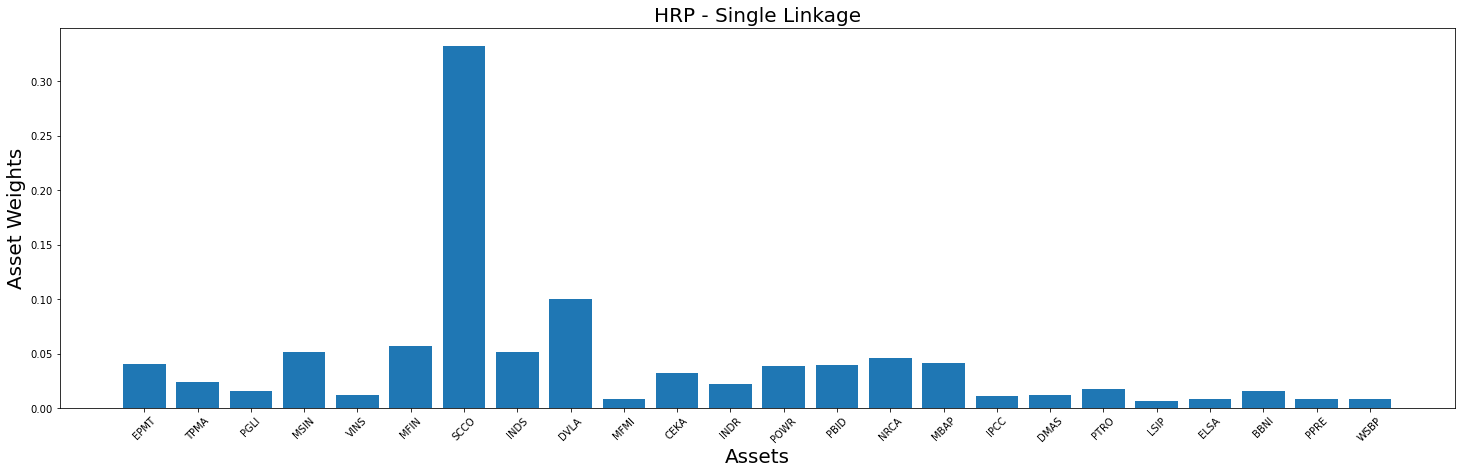

In [7]:
# plotting our optimal portfolio
hrp_single_weights = hrp_single.weights
y_pos = np.arange(len(hrp_single_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hrp_single_weights.columns), hrp_single_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HRP - Single Linkage', size=20)
plt.show()

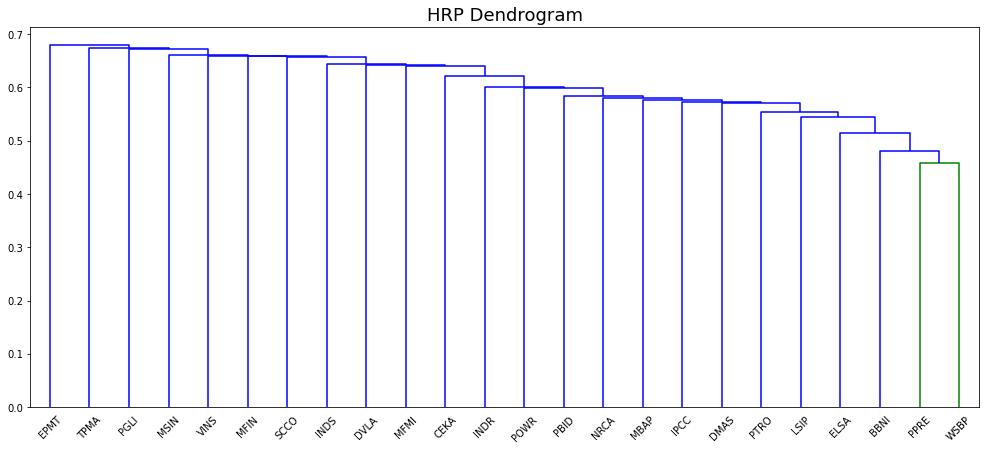

In [8]:
# plotting dendrogram of HRP portfolio
plt.figure(figsize=(17,7))
hrp_single.plot_clusters(stock_prices.columns)
plt.title('HRP Dendrogram', size=18)
plt.xticks(rotation=45)
plt.show()

In [9]:
# constructing our Complete Linkage portfolio
hrp_complete = HierarchicalRiskParity()
hrp_complete.allocate(asset_names=stock_prices.columns,
                      asset_prices=stock_prices,
                      linkage='complete')

print("HRP Portfolio Weights - Complete Linkage \n", hrp_complete.weights)

HRP Portfolio Weights - Complete Linkage 
 level_0     PGLI      VINS     CEKA      MFMI     MSIN      POWR      DMAS  \
0        0.01214  0.007873  0.02667  0.007326  0.03662  0.072337  0.017824   

level_0      NRCA      IPCC      LSIP  ...      MBAP      PTRO     INDR  \
0        0.050537  0.013209  0.014714  ...  0.039252  0.032138  0.01027   

level_0      PBID      DVLA     TPMA      EPMT      MFIN      INDS      SCCO  
0        0.043844  0.091651  0.02187  0.036525  0.048172  0.045877  0.296894  

[1 rows x 24 columns]


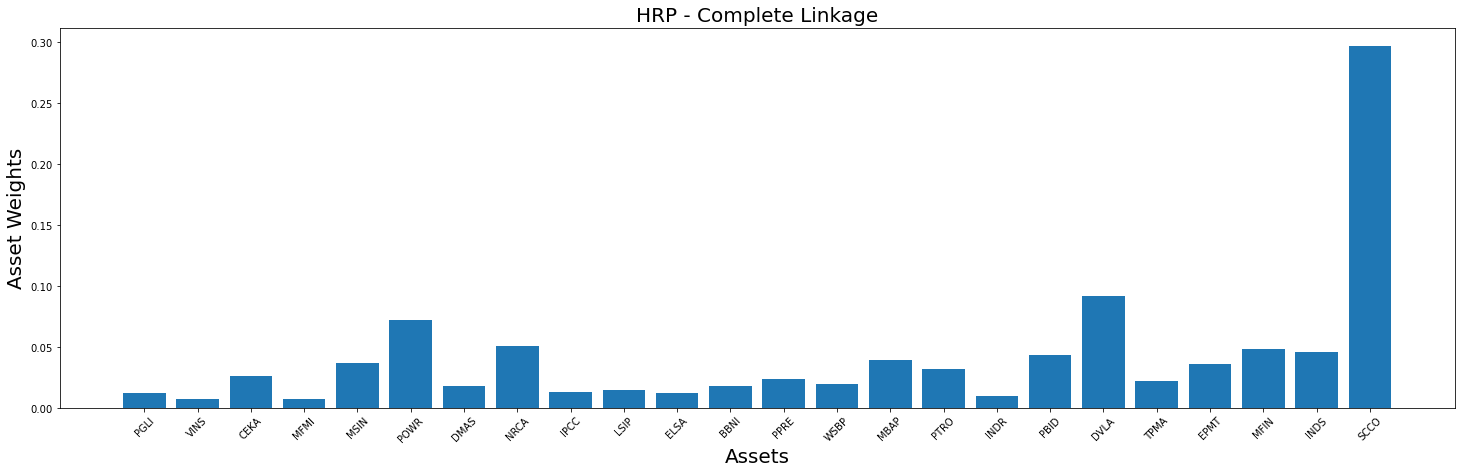

In [10]:
# plotting our optimal portfolio
hrp_complete_weights = hrp_complete.weights
y_pos = np.arange(len(hrp_complete_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hrp_complete_weights.columns), hrp_complete_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HRP - Complete Linkage', size=20)
plt.show()

In [11]:
# constructing our Average Linkage portfolio
hrp_average = HierarchicalRiskParity()
hrp_average.allocate(asset_names=stock_prices.columns,
                     asset_prices=stock_prices,
                     linkage='average')

print("HRP Portfolio Weights - Average Linkage \n", hrp_average.weights)

HRP Portfolio Weights - Average Linkage 
 level_0      TPMA      EPMT      MFIN      PGLI      VINS      CEKA      MFMI  \
0        0.025808  0.040121  0.053327  0.015207  0.009862  0.033408  0.008804   

level_0      MSIN      SCCO      DVLA  ...      PBID      DMAS      IPCC  \
0        0.046461  0.319196  0.093768  ...  0.036217  0.014752  0.010932   

level_0      NRCA      PTRO      LSIP     ELSA      BBNI      PPRE      WSBP  
0        0.041826  0.017266  0.006715  0.00805  0.014886  0.008037  0.007964  

[1 rows x 24 columns]


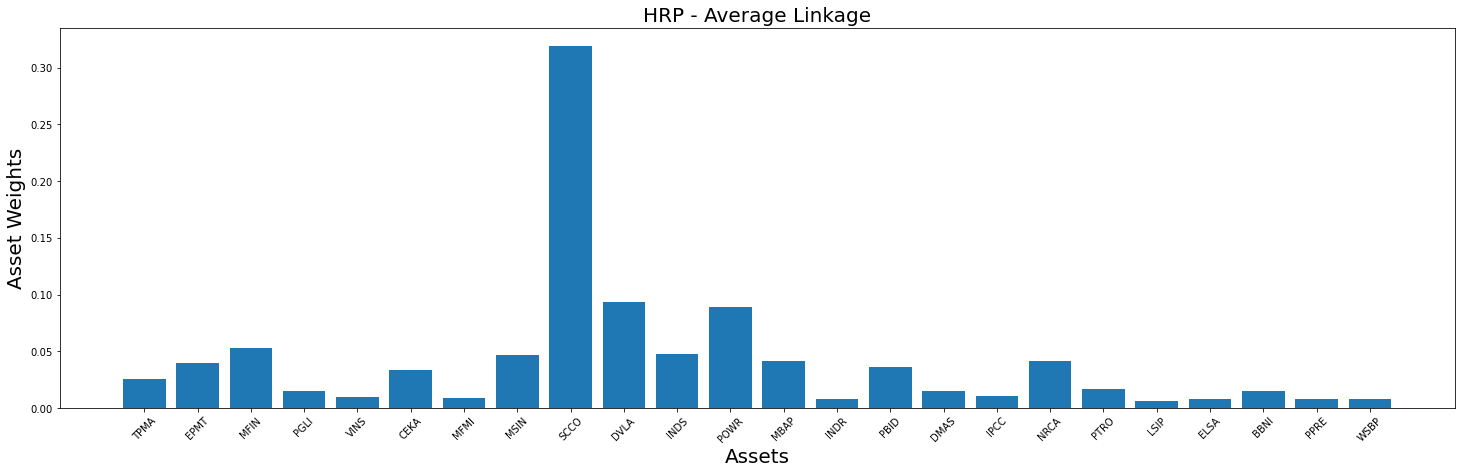

In [12]:
# plotting our optimal portfolio
hrp_average_weights = hrp_average.weights
y_pos = np.arange(len(hrp_average_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hrp_average_weights.columns), hrp_average_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HRP - Average Linkage', size=20)
plt.show()

In [13]:
# constructing our Ward Linkage portfolio
hrp_ward = HierarchicalRiskParity()
hrp_ward.allocate(asset_names=stock_prices.columns,
                  asset_prices=stock_prices,
                  linkage='ward')

print("HRP Portfolio Weights - Ward Linkage \n", hrp_ward.weights)

HRP Portfolio Weights - Ward Linkage 
 level_0      INDS      TPMA      PGLI      VINS     CEKA      MFMI      MSIN  \
0        0.048405  0.022401  0.014467  0.009434  0.02799  0.006516  0.049037   

level_0      SCCO      EPMT      MFIN  ...      ELSA      BBNI      PPRE  \
0        0.329322  0.039327  0.054562  ...  0.012706  0.016361  0.008834   

level_0      WSBP    LSIP      PTRO      MBAP      IPCC      DMAS    NRCA  
0        0.008753  0.0136  0.019111  0.030023  0.013107  0.012276  0.0408  

[1 rows x 24 columns]


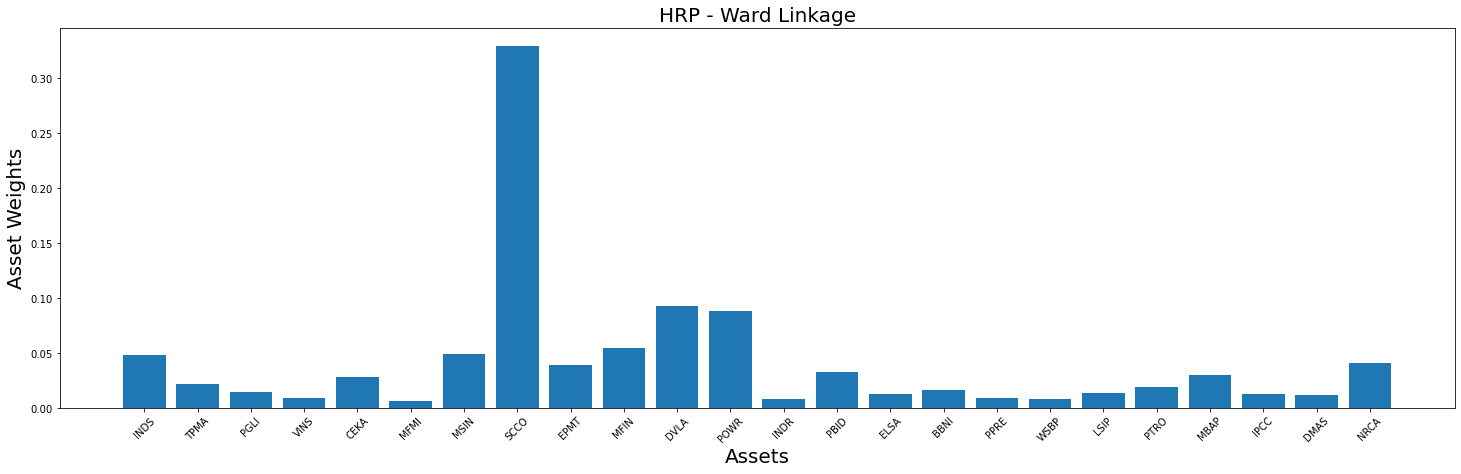

In [14]:
# plotting our optimal portfolio
hrp_ward_weights = hrp_ward.weights
y_pos = np.arange(len(hrp_ward_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hrp_ward_weights.columns), hrp_ward_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HRP - Ward Linkage', size=20)
plt.show()

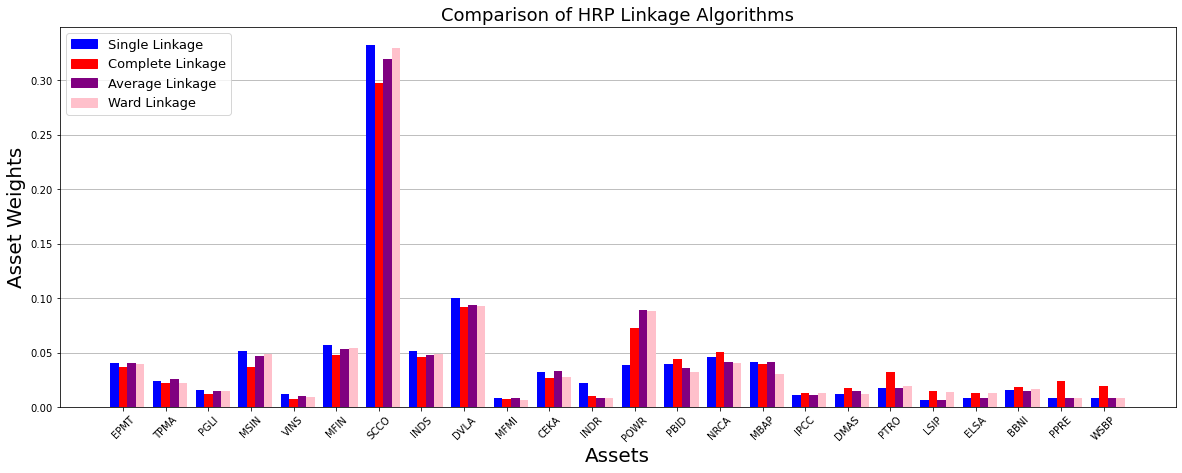

In [15]:
# Comparing different linkage methods
single_linkage_weights = hrp_single.weights
complete_linkage_weights = hrp_complete.weights[single_linkage_weights.columns]
average_linkage_weights = hrp_average.weights[single_linkage_weights.columns]
ward_linkage_weights = hrp_ward.weights[single_linkage_weights.columns]

x = np.arange(len(single_linkage_weights.columns))
bar_width = 0.2

plt.figure(figsize=(20,7))
plt.bar(x, single_linkage_weights.values[0], color='blue', width=bar_width, zorder=2)
plt.bar(x + bar_width, complete_linkage_weights.values[0], color='red', width=bar_width, zorder=2)
plt.bar(x + bar_width*2, average_linkage_weights.values[0], color='purple', width=bar_width, zorder=2)
plt.bar(x + bar_width*3, ward_linkage_weights.values[0], color='pink', width=bar_width, zorder=2)

plt.xticks(x + bar_width, single_linkage_weights, rotation=45, size=10)
plt.title('Comparison of HRP Linkage Algorithms', size=18)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)

blue_patch = mpatches.Patch(color='blue', label='Single Linkage')
red_patch = mpatches.Patch(color='red', label='Complete Linkage')
purple_patch = mpatches.Patch(color='purple', label='Average Linkage')
pink_patch = mpatches.Patch(color='pink', label='Ward Linkage')
plt.legend(handles=[blue_patch, red_patch, purple_patch, pink_patch], loc='upper left', prop={'size': 13})

plt.grid(axis='y')

plt.show()

## Calculating Asset Return by custom Input using Covariance Asset Matrix

In [16]:
# Calculating our asset returns
returns = ReturnsEstimators.calculate_returns(stock_prices)
returns.head()

level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-10,0.013889,0.031963,-0.007752,0.000000,-0.045455,0.0,0.087719,0.014778,-0.037901,-0.005291,...,0.005236,0.000000,0.000000,0.017699,0.000000,0.009709,0.000000,0.000000,-0.026316,0.000000
2018-07-11,-0.017123,-0.004425,-0.015625,0.000000,-0.005952,0.0,0.060484,0.000000,0.000000,-0.021277,...,0.015625,0.000000,0.010000,0.043478,-0.010000,-0.025641,-0.005000,-0.052632,0.027027,-0.005376
2018-07-12,-0.020906,-0.004444,0.007937,0.000000,0.005988,0.0,-0.019011,0.014563,0.000000,0.021739,...,0.020513,0.000000,-0.009901,-0.041667,0.020202,0.039474,0.005025,0.000000,-0.017544,0.021622
2018-07-13,0.032028,0.000000,0.000000,0.000000,0.000000,0.0,0.003876,-0.019139,-0.003030,-0.010638,...,-0.005025,-0.004587,0.040000,0.000000,0.009901,-0.009494,0.000000,0.000000,0.071428,0.000000
2018-07-16,0.013793,-0.017857,-0.007874,0.005181,-0.023810,0.0,-0.042471,-0.014634,-0.009118,-0.016129,...,0.000000,0.004608,-0.019231,0.000000,0.000000,-0.009585,0.000000,0.055556,-0.016667,0.000000


In [17]:
# Calculating our covariance matrix
cov = returns.cov()
cov

level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
level_0,,,,,,,,,,,,,,,,,,,,,
BBNI,0.000651,0.000130,0.000261,0.000027,0.000318,-0.000019,0.000253,1.204176e-04,0.000306,0.000345,...,0.000122,0.000156,5.082316e-05,1.466590e-04,0.000316,0.000243,0.000014,3.016596e-05,-0.000047,0.000382
CEKA,0.000130,0.001050,0.000110,0.000025,0.000121,-0.000038,0.000123,6.605223e-05,0.000180,0.000181,...,0.000131,0.000089,1.579481e-04,3.957089e-05,0.000133,0.000140,0.000021,1.051742e-04,0.000252,0.000148
DMAS,0.000261,0.000110,0.001049,0.000070,0.000243,0.000019,0.000131,3.945072e-05,0.000246,0.000217,...,0.000156,0.000044,1.332312e-05,9.927931e-05,0.000220,0.000143,0.000008,9.676942e-05,0.000096,0.000315
DVLA,0.000027,0.000025,0.000070,0.000390,0.000040,-0.000009,0.000014,3.490371e-06,-0.000013,0.000057,...,-0.000015,0.000067,-2.628528e-05,4.660234e-05,0.000059,0.000032,0.000003,1.358677e-05,-0.000060,0.000086
ELSA,0.000318,0.000121,0.000243,0.000040,0.000940,0.000010,0.000280,1.106323e-04,0.000322,0.000389,...,0.000154,0.000098,2.505732e-05,1.233280e-04,0.000376,0.000281,0.000010,1.848447e-05,0.000057,0.000400
EPMT,-0.000019,-0.000038,0.000019,-0.000009,0.000010,0.000989,0.000026,-1.108581e-05,-0.000065,0.000010,...,-0.000006,-0.000051,2.733755e-05,-4.617965e-05,-0.000041,0.000018,0.000013,-1.269325e-05,0.000012,-0.000058
INDR,0.000253,0.000123,0.000131,0.000014,0.000280,0.000026,0.001568,6.247488e-05,0.000245,0.000248,...,0.000097,0.000197,1.943717e-05,1.043224e-04,0.000302,0.000246,0.000009,7.143397e-06,-0.000078,0.000236
INDS,0.000120,0.000066,0.000039,0.000003,0.000111,-0.000011,0.000062,7.644785e-04,0.000105,0.000078,...,0.000031,-0.000009,-4.003689e-05,-8.854802e-07,0.000075,0.000079,0.000010,3.079409e-05,0.000042,0.000096
IPCC,0.000306,0.000180,0.000246,-0.000013,0.000322,-0.000065,0.000245,1.050163e-04,0.001208,0.000327,...,0.000131,0.000089,-4.071103e-05,6.287437e-05,0.000230,0.000126,-0.000021,-3.141065e-05,0.000088,0.000287


### Building our First Custom Portfolio

In [18]:
# constructing our first custom portfolio
hrp_custom = HierarchicalRiskParity()
hrp_custom.allocate(asset_names=stock_prices.columns,
                    asset_returns=returns,
                    covariance_matrix=cov)
print("Custom HRP Portfolio Weights\n", hrp_custom.weights)

Custom HRP Portfolio Weights
 level_0      EPMT      TPMA      PGLI      MSIN      VINS      MFIN      SCCO  \
0        0.040804  0.024435  0.015781  0.051299  0.011885  0.056789  0.332322   

level_0      INDS      DVLA      MFMI  ...      NRCA      MBAP      IPCC  \
0        0.051042  0.099942  0.008279  ...  0.046015  0.040976  0.010703   

level_0      DMAS      PTRO      LSIP      ELSA      BBNI      PPRE      WSBP  
0        0.012321  0.017776  0.006914  0.008288  0.015326  0.008275  0.008199  

[1 rows x 24 columns]


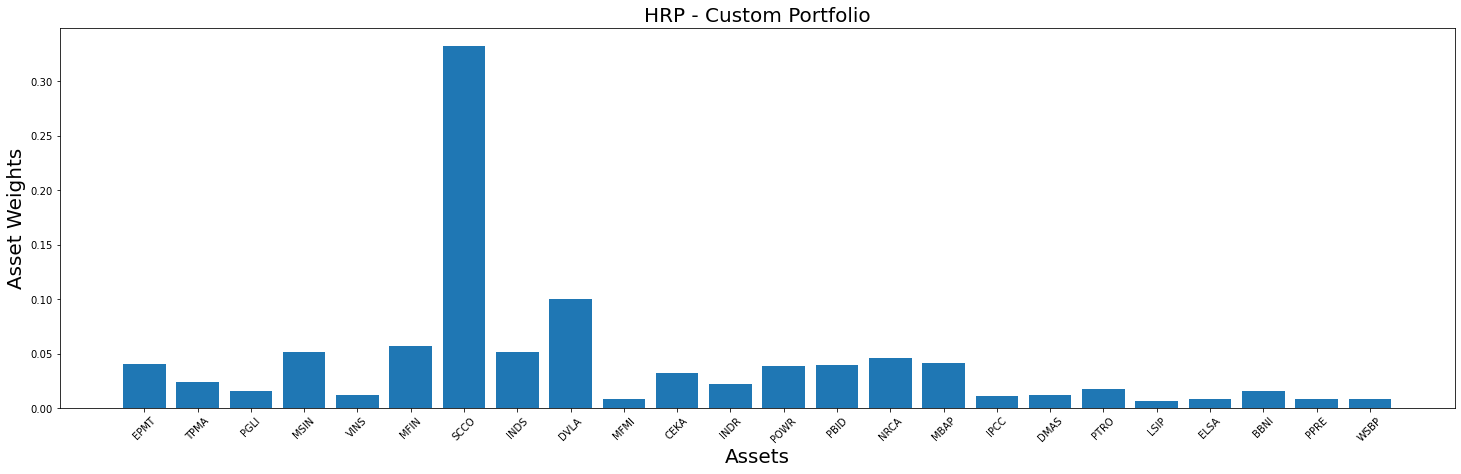

In [19]:
# plotting our optimal portfolio
hrp_custom_weights = hrp_custom.weights
y_pos = np.arange(len(hrp_custom_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hrp_custom_weights.columns), hrp_custom_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HRP - Custom Portfolio', size=20)
plt.show()

### Using a Custom Distance Matrix
We can also use our own distance matrix to calculate our optimal portfolio. This distance matrix will be derived directly from the covariance matrix.

We can make use of the cov_to_corr() method from the RiskEstimators class to perform some of the necessary calculations.

In [20]:
from mlfinlab.portfolio_optimization import RiskEstimators

corr = RiskEstimators.cov_to_corr(cov)
distance = np.sqrt((1 - corr).round(5) / 2)

hrp_distance = HierarchicalRiskParity()
hrp_distance.allocate(asset_names=stock_prices.columns,
                      distance_matrix=distance, 
                      covariance_matrix=cov)

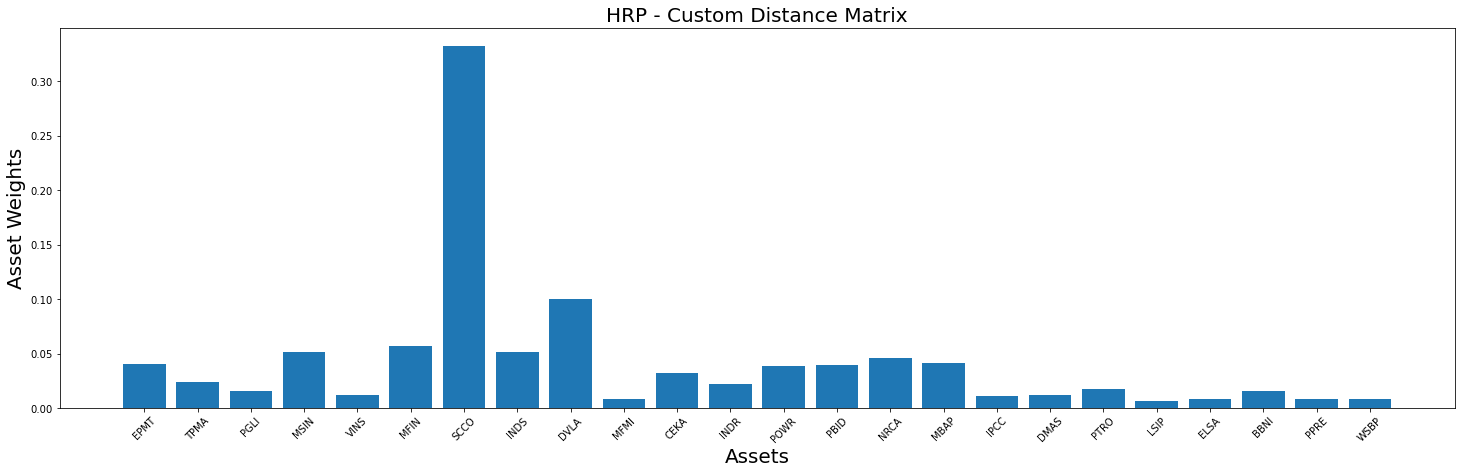

In [21]:
# plotting our optimal portfolio
hrp_distance_weights = hrp_distance.weights
y_pos = np.arange(len(hrp_distance_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hrp_distance_weights.columns), hrp_distance_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HRP - Custom Distance Matrix', size=20)
plt.show()

### Building our Long/Short Portfolio
We will construct our Long/Short portfolio utilizing the side_weights parameter. By shorting the first four stocks in our dataset we can construct our optimal portfolio the same way we constructed it earlier, of course with the addition of the side_weight parameter to indicate which stocks we would like to short and long (-1 indicates shorting a stock and 1 indicates going long on a stock).

In [22]:
hrp_ls = HierarchicalRiskParity()
side_weights = pd.Series([1]*stock_prices.shape[1], index=stock_prices.columns)

# short the first 4 stocks
side_weights.loc[stock_prices.columns[:4]] = -1

hrp_ls.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                side_weights=side_weights)

print(side_weights)

level_0
BBNI   -1
CEKA   -1
DMAS   -1
DVLA   -1
ELSA    1
EPMT    1
INDR    1
INDS    1
IPCC    1
LSIP    1
MBAP    1
MFIN    1
MFMI    1
MSIN    1
NRCA    1
PBID    1
PGLI    1
POWR    1
PPRE    1
PTRO    1
SCCO    1
TPMA    1
VINS    1
WSBP    1
dtype: int64


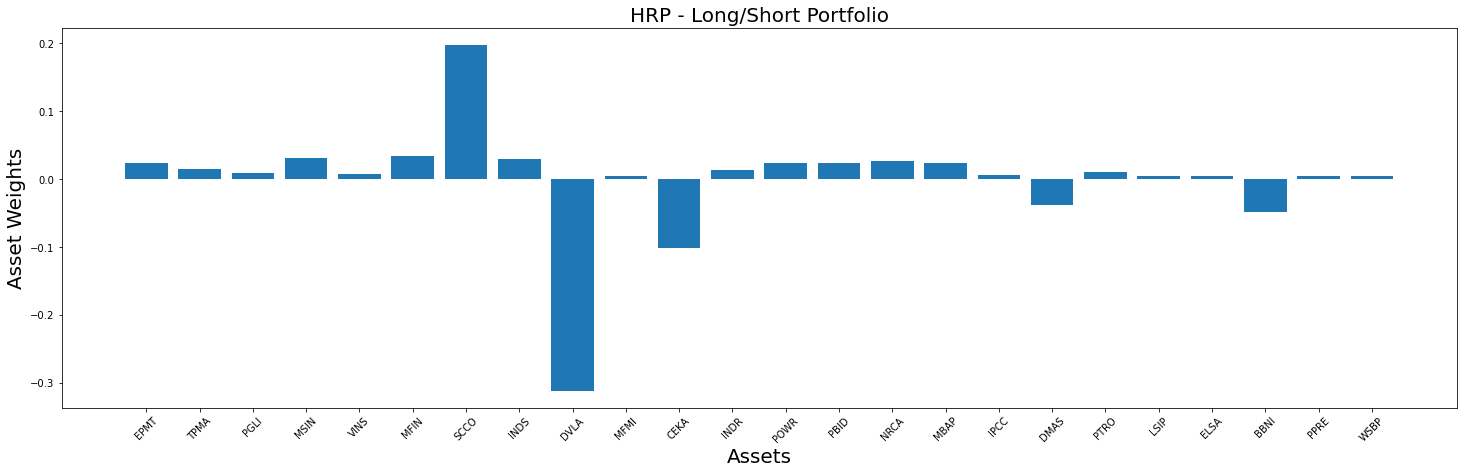

In [23]:
# plotting our optimal portfolio
hrp_ls_weights = hrp_ls.weights
y_pos = np.arange(len(hrp_ls_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hrp_ls_weights.columns), hrp_ls_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HRP - Long/Short Portfolio', size=20)
plt.show()